In [1]:
import pandas as pd
import scipy as scp
import scipy.linalg as lalg
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
train = pd.read_table('IrisTrainML.dt', header = None, sep = ' ')
test = pd.read_table('IrisTestML.dt', header = None, sep = ' ')

In [3]:
train.columns = ['feat_1', 'feat_2', 'label']
test.columns = ['feat_1', 'feat_2', 'label']

In [4]:
train = train.loc[train.label != 2, :]
test = test.loc[test.label != 2, :]

In [5]:
def change_label(y) :
    if (y == 0) :
        return -1
    else :
        return y

In [6]:
train['label'] = train['label'].apply(change_label)
test['label'] = test['label'].apply(change_label)

In [7]:
x = train[['feat_1', 'feat_2']].values

In [8]:
y = train['label'].values

In [9]:
def gradient(x, y, w, n) :
    num = x * y[:,scp.newaxis]
    den = scp.dot(x, w) * y
    den = scp.exp(den) + 1
    quotient = num / den[:,scp.newaxis]
    avg = scp.sum(quotient, axis = 0) / n
    return - avg

In [22]:
x1 = scp.array([[1],[1]])
y1 = scp.array([1])
w1 = scp.array([1])
n = 1

In [25]:
gradient(x1, y1, w1, n)

array([-0.53788284])

In [21]:
1/(1+scp.exp(2))

0.11920292202211755

In [247]:
#improve this one
def terminate(e, error_stop, gnorm, gnorm_stop) :
    if ((gnorm < gnorm_stop) and (e < error_stop )) : return True
    else : return False

In [226]:
def error(x, y, classifier, n) :
    pred = scp.apply_along_axis(classifier, 1, x)
    e = abs((pred - y)) / 2
    e = scp.sum(e) / n
    return e
    

In [195]:
def make_classifier(w) :
    def classifier(x) :
        p = scp.exp(scp.dot(x,w))/(1 + scp.exp(scp.dot(x,w)))
        if (p > 0.5) : return 1
        else : return -1
    return classifier

In [245]:
def log_reg(x, 
            y, 
            rate = 1, 
            gnorm_stop = 0.01, 
            error_stop = 0.05, 
            iterations_stop = 1000000, 
            start_weigths = None) :
    
    if (start_weigths == None) : w = scp.random.normal(size = x.shape[1])
    else : w = start_weights
    
    n = x.shape[0]
    ws = []
    gnorms = []
    es = []
    i = 1
    
    while (i <= iterations_stop) : 
    
        ws.append(w)
        g = gradient(x, y, w, n)
        gnorm = lalg.norm(g)
        gnorms.append(gnorm)
        c = make_classifier(w)
        e = error(x,y,c,n)
        es.append(e)
        
        if terminate(e, error_stop, gnorm, gnorm_stop) : break
        
        w = w + (-g) * rate 
        i = i + 1
    
    return c, w, scp.array(gnorms), scp.array(ws), scp.array(es)

In [248]:
c, w, gnorms, ws, es = log_reg(x, y, rate = 0.25, iterations_stop = 100000)

In [253]:
w

array([  1.31504769, -23.28526441])

In [254]:
gnorms[-1:]

array([ 0.00999916])

In [249]:
error(x, y, c, x.shape[0])

0.016129032258064516

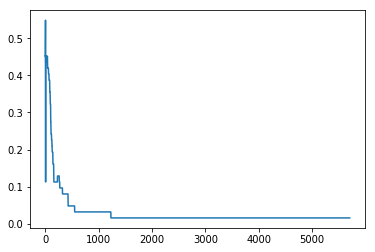

In [250]:
plt.plot(es[:])

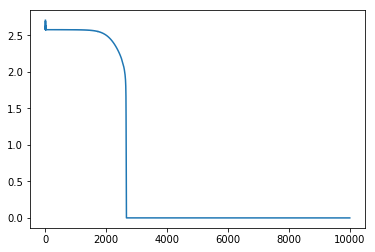

In [251]:
plt.plot(norms[:])

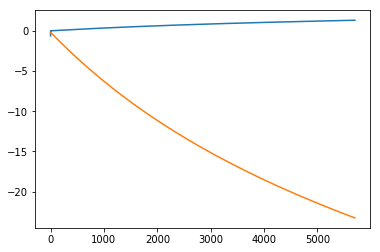

In [252]:
plt.plot(ws[:,0])
plt.plot(ws[:,1])